In [ ]:
# Interactive ZKP: Schnorr Identification Protocol

import hashlib
import random

# --- Setup Parameters (using small numbers for demonstration; not secure) ---
p = 23  # a prime number
q = 11  # a prime divisor of (p-1)
g = 2   # generator of a subgroup of Z_p of order q

# Prover's secret (randomly chosen from 1 to q-1)
secret = random.randint(1, q-1)
# Prover's public key computed as: pub_key = g^secret mod p
pub_key = pow(g, secret, p)

print("Public Parameters:")
print("p =", p, "q =", q, "g =", g)
print("Prover's public key:", pub_key)

# --- Interactive Protocol ---
def schnorr_prover():
    # Step 1: Prover picks a random nonce r
    r = random.randint(1, q-1)
    # Commitment: a = g^r mod p
    a = pow(g, r, p)
    print("\n[Prover] Commitment 'a':", a)

    # Step 2: Verifier sends a challenge 'c' (randomly chosen)
    c = random.randint(1, q-1)
    print("[Verifier] Challenge 'c':", c)

    # Step 3: Prover computes response: s = (r + c*secret) mod q
    s = (r + c * secret) % q
    print("[Prover] Response 's':", s)

    return a, c, s

def schnorr_verifier(a, c, s):
    # Verifier checks: g^s mod p ?= a * (pub_key)^c mod p
    left = pow(g, s, p)
    right = (a * pow(pub_key, c, p)) % p
    print("\n[Verifier] Computed g^s =", left)
    print("[Verifier] Computed a * pub_key^c =", right)
    if left == right:
        print("[Verifier] Verification Successful: Prover is authenticated!")
    else:
        print("[Verifier] Verification Failed: Proof is invalid.")

# Execute the interactive ZKP simulation
a, c, s = schnorr_prover()
schnorr_verifier(a, c, s)


Public Parameters:
p = 23 q = 11 g = 2
Prover's public key: 6

[Prover] Commitment 'a': 16
[Verifier] Challenge 'c': 5
[Prover] Response 's': 5

[Verifier] Computed g^s = 9
[Verifier] Computed a * pub_key^c = 9
[Verifier] Verification Successful: Prover is authenticated!


In [ ]:
import time
import random

# ---- Parameters for the demo (using small numbers for demonstration) ----
p = 23         # a small prime (modulus)
q = 11         # a small prime (order of subgroup)
g = 2          # generator
secret = 4     # Prover's secret (fixed for reproducibility)
pub_key = pow(g, secret, p)  # Public key computed as g^secret mod p

print("=== Interactive ZKP (Schnorr Protocol) Real-Time Simulation ===")
print(f"Public parameters: p = {p}, q = {q}, g = {g}")
print(f"Prover's secret: {secret}")
print(f"Prover's public key: {pub_key}\n")

def interactive_schnorr_round(secret, p, q, g):
    round_start = time.time()
    print("=== Starting New Interactive Round ===")

    # Step 1: Prover generates a random nonce and computes commitment a.
    r = random.randint(1, q-1)
    a = pow(g, r, p)
    print(f"[{time.strftime('%H:%M:%S')}] Prover computes commitment 'a' = {a}")
    time.sleep(2)  # Simulate communication delay

    # Step 2: Verifier sends a random challenge 'c'.
    c = random.randint(1, q-1)
    print(f"[{time.strftime('%H:%M:%S')}] Verifier sends challenge 'c' = {c}")
    time.sleep(2)  # Simulate communication delay

    # Step 3: Prover computes response s = (r + c * secret) mod q.
    s = (r + c * secret) % q
    print(f"[{time.strftime('%H:%M:%S')}] Prover computes response 's' = {s}")
    time.sleep(2)  # Simulate processing delay

    # Verification: Check if g^s mod p equals a * pub_key^c mod p.
    left = pow(g, s, p)
    right = (a * pow(pub_key, c, p)) % p
    print(f"[{time.strftime('%H:%M:%S')}] Verifier computes: g^s = {left}")
    print(f"[{time.strftime('%H:%M:%S')}] Verifier computes: a * pub_key^c = {right}")

    verification = left == right
    if verification:
        print(f"[{time.strftime('%H:%M:%S')}] Verification Successful: The proof is valid.\n")
    else:
        print(f"[{time.strftime('%H:%M:%S')}] Verification Failed: The proof is invalid.\n")

    round_duration = time.time() - round_start
    print(f"Round completed in {round_duration:.4f} seconds.\n")
    return verification

# Run multiple rounds to simulate an interactive session
num_rounds = 3
results = []

for i in range(num_rounds):
    print(f"--- Interactive Round {i+1} ---")
    result = interactive_schnorr_round(secret, p, q, g)
    results.append(result)

if all(results):
    print("All interactive rounds verified successfully!")
else:
    print("Some rounds failed verification!")



=== Interactive ZKP (Schnorr Protocol) Real-Time Simulation ===
Public parameters: p = 23, q = 11, g = 2
Prover's secret: 4
Prover's public key: 16

--- Interactive Round 1 ---
=== Starting New Interactive Round ===
[13:32:52] Prover computes commitment 'a' = 9
[13:32:54] Verifier sends challenge 'c' = 1
[13:32:56] Prover computes response 's' = 9
[13:32:58] Verifier computes: g^s = 6
[13:32:58] Verifier computes: a * pub_key^c = 6
[13:32:58] Verification Successful: The proof is valid.

Round completed in 6.0010 seconds.

--- Interactive Round 2 ---
=== Starting New Interactive Round ===
[13:32:58] Prover computes commitment 'a' = 2
[13:33:00] Verifier sends challenge 'c' = 2
[13:33:02] Prover computes response 's' = 9
[13:33:04] Verifier computes: g^s = 6
[13:33:04] Verifier computes: a * pub_key^c = 6
[13:33:04] Verification Successful: The proof is valid.

Round completed in 6.0010 seconds.

--- Interactive Round 3 ---
=== Starting New Interactive Round ===
[13:33:04] Prover comput

In [ ]:
# =============================
# Technique 1: Synchronous Simulation with Delays
# =============================
import time, random

# Fixed parameters (small values for demo purposes)
p = 23         # Prime modulus
q = 11         # Order of subgroup (prime)
g = 2          # Generator
secret = 4     # Prover's secret (fixed for reproducibility)
pub_key = pow(g, secret, p)  # Public key: g^secret mod p

print("=== Technique 1: Synchronous ZKP Simulation ===")
print(f"Public parameters: p={p}, q={q}, g={g}")
print(f"Prover's secret: {secret}")
print(f"Prover's public key: {pub_key}\n")

def synchronous_round(secret, p, q, g):
    round_start = time.time()
    print(">> New Round Started (Synchronous)")

    # Step 1: Prover generates a random nonce and computes commitment a.
    r = random.randint(1, q-1)
    a = pow(g, r, p)
    print(f"[{time.strftime('%H:%M:%S')}] Prover computes commitment a = {a}")
    time.sleep(2)  # Simulate network delay

    # Step 2: Verifier sends a random challenge c.
    c = random.randint(1, q-1)
    print(f"[{time.strftime('%H:%M:%S')}] Verifier sends challenge c = {c}")
    time.sleep(2)

    # Step 3: Prover computes response s = (r + c*secret) mod q.
    s = (r + c * secret) % q
    print(f"[{time.strftime('%H:%M:%S')}] Prover computes response s = {s}")
    time.sleep(2)

    # Verification step:
    left = pow(g, s, p)
    right = (a * pow(pub_key, c, p)) % p
    print(f"[{time.strftime('%H:%M:%S')}] Verifier computes: g^s = {left}")
    print(f"[{time.strftime('%H:%M:%S')}] Verifier computes: a * pub_key^c = {right}")

    verification = left == right
    result = "Successful" if verification else "Failed"
    print(f"[{time.strftime('%H:%M:%S')}] Verification {result}.")

    round_duration = time.time() - round_start
    print(f"Round completed in {round_duration:.4f} seconds.\n")
    return verification

# Run a single synchronous round
synchronous_round(secret, p, q, g)


=== Technique 1: Synchronous ZKP Simulation ===
Public parameters: p=23, q=11, g=2
Prover's secret: 4
Prover's public key: 16

>> New Round Started (Synchronous)
[13:35:45] Prover computes commitment a = 8
[13:35:47] Verifier sends challenge c = 5
[13:35:49] Prover computes response s = 1
[13:35:51] Verifier computes: g^s = 2
[13:35:51] Verifier computes: a * pub_key^c = 2
[13:35:51] Verification Successful.
Round completed in 6.0010 seconds.



True

In [ ]:
# =============================
# Technique 2: Interactive Simulation with User Input
# =============================
print("=== Technique 2: Interactive ZKP Simulation with User Input ===")
print(f"Public parameters: p={p}, q={q}, g={g}")
print(f"Prover's secret: {secret}")
print(f"Prover's public key: {pub_key}\n")

def interactive_round(secret, p, q, g):
    print(">> New Interactive Round Started")

    input("Press Enter to let the Prover generate a random nonce and compute commitment a...")
    r = random.randint(1, q-1)
    a = pow(g, r, p)
    print(f"Prover computes commitment a = {a}")

    input("Press Enter to let the Verifier send a challenge c...")
    c = random.randint(1, q-1)
    print(f"Verifier sends challenge c = {c}")

    input("Press Enter to let the Prover compute the response s...")
    s = (r + c * secret) % q
    print(f"Prover computes response s = {s}")

    input("Press Enter to let the Verifier verify the proof...")
    left = pow(g, s, p)
    right = (a * pow(pub_key, c, p)) % p
    print(f"Verifier computes: g^s = {left}")
    print(f"Verifier computes: a * pub_key^c = {right}")

    verification = left == right
    if verification:
        print("Verification Successful: The proof is valid.\n")
    else:
        print("Verification Failed: The proof is invalid.\n")
    return verification

# Run the interactive round (user presses Enter at each step)
interactive_round(secret, p, q, g)


=== Technique 2: Interactive ZKP Simulation with User Input ===
Public parameters: p=23, q=11, g=2
Prover's secret: 4
Prover's public key: 16

>> New Interactive Round Started
Press Enter to let the Prover generate a random nonce and compute commitment a...\
Prover computes commitment a = 8
Press Enter to let the Verifier send a challenge c...
Verifier sends challenge c = 10
Press Enter to let the Prover compute the response s...
Prover computes response s = 10
Press Enter to let the Verifier verify the proof...
Verifier computes: g^s = 12
Verifier computes: a * pub_key^c = 12
Verification Successful: The proof is valid.



True

In [ ]:
# =============================
# Technique 3: Asynchronous Simulation with asyncio
# =============================
import asyncio

print("=== Technique 3: Asynchronous ZKP Simulation with asyncio ===")
print(f"Public parameters: p={p}, q={q}, g={g}")
print(f"Prover's secret: {secret}")
print(f"Prover's public key: {pub_key}\n")

async def async_prover(secret, p, q, g):
    # Step 1: Prover generates a random nonce and computes commitment a.
    await asyncio.sleep(1)  # Simulate asynchronous delay
    r = random.randint(1, q-1)
    a = pow(g, r, p)
    print(f"[{time.strftime('%H:%M:%S')}] Prover: Commitment a = {a}")
    return r, a

async def async_verifier(p, q, g):
    # Step 2: Verifier sends a random challenge c after a delay.
    await asyncio.sleep(2)
    c = random.randint(1, q-1)
    print(f"[{time.strftime('%H:%M:%S')}] Verifier: Challenge c = {c}")
    return c

async def async_response(secret, r, c, q):
    # Step 3: Prover computes response s.
    await asyncio.sleep(1)
    s = (r + c * secret) % q
    print(f"[{time.strftime('%H:%M:%S')}] Prover: Response s = {s}")
    return s

async def async_verification(pub_key, a, s, c, p, g):
    # Verification step by the verifier.
    await asyncio.sleep(1)
    left = pow(g, s, p)
    right = (a * pow(pub_key, c, p)) % p
    print(f"[{time.strftime('%H:%M:%S')}] Verifier: g^s = {left}")
    print(f"[{time.strftime('%H:%M:%S')}] Verifier: a * pub_key^c = {right}")
    verification = left == right
    result = "Successful" if verification else "Failed"
    print(f"[{time.strftime('%H:%M:%S')}] Verification {result}.\n")
    return verification

async def asynchronous_round(secret, p, q, g, pub_key):
    print(">> New Asynchronous Round Started")
    # Run prover and verifier tasks concurrently in sequence
    r, a = await async_prover(secret, p, q, g)
    c = await async_verifier(p, q, g)
    s = await async_response(secret, r, c, q)
    verification = await async_verification(pub_key, a, s, c, p, g)
    return verification

# Run the asynchronous round using asyncio
async def run_async_simulation():
    rounds = 3
    results = []
    for i in range(rounds):
        print(f"--- Asynchronous Round {i+1} ---")
        res = await asynchronous_round(secret, p, q, g, pub_key)
        results.append(res)
    if all(results):
        print("All asynchronous rounds verified successfully!")
    else:
        print("Some rounds failed verification!")

# Execute the asynchronous simulation
await run_async_simulation()


=== Technique 3: Asynchronous ZKP Simulation with asyncio ===
Public parameters: p=23, q=11, g=2
Prover's secret: 4
Prover's public key: 16

--- Asynchronous Round 1 ---
>> New Asynchronous Round Started
[13:37:19] Prover: Commitment a = 9
[13:37:21] Verifier: Challenge c = 9
[13:37:22] Prover: Response s = 8
[13:37:23] Verifier: g^s = 3
[13:37:23] Verifier: a * pub_key^c = 3
[13:37:23] Verification Successful.

--- Asynchronous Round 2 ---
>> New Asynchronous Round Started
[13:37:24] Prover: Commitment a = 6
[13:37:26] Verifier: Challenge c = 5
[13:37:27] Prover: Response s = 7
[13:37:28] Verifier: g^s = 13
[13:37:28] Verifier: a * pub_key^c = 13
[13:37:28] Verification Successful.

--- Asynchronous Round 3 ---
>> New Asynchronous Round Started
[13:37:29] Prover: Commitment a = 18
[13:37:31] Verifier: Challenge c = 5
[13:37:32] Prover: Response s = 4
[13:37:33] Verifier: g^s = 16
[13:37:33] Verifier: a * pub_key^c = 16
[13:37:33] Verification Successful.

All asynchronous rounds verif

In [ ]:
# Comparative Analysis of Interactive ZKP Simulation Techniques

comparison_table = """
+--------------------------------------+-------------------------------------------------------+------------------------------------------------------------+------------------------------------------------------------+
|           Technique                  |                   Description                         |                          Pros                              |                          Cons                              |
+--------------------------------------+-------------------------------------------------------+------------------------------------------------------------+------------------------------------------------------------+
| 1. Synchronous (time.sleep)          | Uses fixed delays (time.sleep) to simulate            | - Simple and straightforward to implement                 | - Blocks execution; not truly interactive                  |
|                                      | network/processing delays in a sequential flow.       | - Clear, step-by-step execution with timestamps            | - No user control over progression                         |
+--------------------------------------+-------------------------------------------------------+------------------------------------------------------------+------------------------------------------------------------+
| 2. Interactive (user input)          | Uses input() calls to pause and let the user            | - Allows manual control and engagement during the demo     | - Requires manual intervention at every step               |
|                                      | trigger each step.                                    | - Good for live presentations and demonstration            | - Not automated; can slow down the demo if not careful       |
+--------------------------------------+-------------------------------------------------------+------------------------------------------------------------+------------------------------------------------------------+
| 3. Asynchronous (asyncio)            | Uses Python's asyncio to simulate parallel              | - Mimics real-time, non-blocking, asynchronous communication | - More complex code; requires familiarity with async syntax  |
|                                      | communication between prover and verifier.            | - Realistic simulation of concurrent interactions          | - Harder to debug and may be less intuitive for beginners    |
+--------------------------------------+-------------------------------------------------------+------------------------------------------------------------+------------------------------------------------------------+
"""

print("Comparative Analysis of Interactive ZKP Simulation Techniques:")
print(comparison_table)


Comparative Analysis of Interactive ZKP Simulation Techniques:

+--------------------------------------+-------------------------------------------------------+------------------------------------------------------------+------------------------------------------------------------+
|           Technique                  |                   Description                         |                          Pros                              |                          Cons                              |
+--------------------------------------+-------------------------------------------------------+------------------------------------------------------------+------------------------------------------------------------+
| 1. Synchronous (time.sleep)          | Uses fixed delays (time.sleep) to simulate            | - Simple and straightforward to implement                 | - Blocks execution; not truly interactive                  |
|                                      | network/processing d

In [ ]:
import time
import random
import asyncio

# --------------------------
# Shared Parameters (Small Demo Values)
# --------------------------
p = 23         # prime modulus (demo value)
q = 11         # subgroup order (demo value)
g = 2          # generator
secret = 4     # Prover's secret (fixed)
pub_key = pow(g, secret, p)

# --------------------------
# Technique 1: Synchronous Simulation with time.sleep()
# --------------------------
def synchronous_round(secret, p, q, g):
    start = time.time()
    # Prover computes random nonce and commitment
    r = random.randint(1, q-1)
    a = pow(g, r, p)
    time.sleep(1)  # simulate network delay
    # Verifier sends challenge
    c = random.randint(1, q-1)
    time.sleep(1)
    # Prover computes response
    s = (r + c * secret) % q
    time.sleep(1)
    # Verification
    left = pow(g, s, p)
    right = (a * pow(pub_key, c, p)) % p
    verification = left == right
    end = time.time()
    return verification, end - start

# --------------------------
# Technique 2: Interactive Simulation with (Simulated) User Input
# --------------------------
# Here we simulate user input by using fixed delay (as if the user pressed Enter)
def interactive_round_simulated(secret, p, q, g):
    start = time.time()
    # Instead of waiting for user input, we use a fixed delay.
    time.sleep(1)  # waiting for "user" to trigger nonce generation
    r = random.randint(1, q-1)
    a = pow(g, r, p)

    time.sleep(1)  # waiting for "user" to trigger challenge sending
    c = random.randint(1, q-1)

    time.sleep(1)  # waiting for "user" to trigger response calculation
    s = (r + c * secret) % q

    time.sleep(1)  # waiting for "user" to trigger verification
    left = pow(g, s, p)
    right = (a * pow(pub_key, c, p)) % p
    verification = left == right
    end = time.time()
    return verification, end - start

# --------------------------
# Technique 3: Asynchronous Simulation with asyncio
# --------------------------
async def async_prover(secret, p, q, g):
    await asyncio.sleep(0.5)  # asynchronous delay for nonce computation
    r = random.randint(1, q-1)
    a = pow(g, r, p)
    return r, a

async def async_verifier(p, q, g):
    await asyncio.sleep(1)  # asynchronous delay for sending challenge
    c = random.randint(1, q-1)
    return c

async def async_response(secret, r, c, q):
    await asyncio.sleep(0.5)  # asynchronous delay for computing response
    s = (r + c * secret) % q
    return s

async def async_verification(pub_key, a, s, c, p, g):
    await asyncio.sleep(0.5)  # asynchronous delay for verification
    left = pow(g, s, p)
    right = (a * pow(pub_key, c, p)) % p
    return left == right

async def asynchronous_round(secret, p, q, g, pub_key):
    start = time.time()
    r, a = await async_prover(secret, p, q, g)
    c = await async_verifier(p, q, g)
    s = await async_response(secret, r, c, q)
    verification = await async_verification(pub_key, a, s, c, p, g)
    end = time.time()
    return verification, end - start

# --------------------------
# Running Comparative Simulations
# --------------------------
num_rounds = 3

sync_times = []
interactive_times = []
async_times = []

print("Running Comparative Simulations ({} rounds each)...\n".format(num_rounds))

# Technique 1: Synchronous Simulation
for i in range(num_rounds):
    valid, t = synchronous_round(secret, p, q, g)
    sync_times.append(t)
    print(f"Technique 1 (Synchronous) Round {i+1}: Verification: {valid}, Time: {t:.4f} sec")

# Technique 2: Interactive Simulation (Simulated Input)
for i in range(num_rounds):
    valid, t = interactive_round_simulated(secret, p, q, g)
    interactive_times.append(t)
    print(f"Technique 2 (Interactive Simulated) Round {i+1}: Verification: {valid}, Time: {t:.4f} sec")

# Technique 3: Asynchronous Simulation
async def run_async_rounds():
    results = []
    for i in range(num_rounds):
        valid, t = await asynchronous_round(secret, p, q, g, pub_key)
        results.append((valid, t))
        print(f"Technique 3 (Asynchronous) Round {i+1}: Verification: {valid}, Time: {t:.4f} sec")
    return results

async_results = await run_async_rounds()
for valid, t in async_results:
    async_times.append(t)

# --------------------------
# Comparative Summary Report
# --------------------------
avg_sync = sum(sync_times) / num_rounds
avg_interactive = sum(interactive_times) / num_rounds
avg_async = sum(async_times) / num_rounds

comparison_report = f"""
Comparative Simulation Report (over {num_rounds} rounds each):

Technique 1: Synchronous Simulation with time.sleep()
  - Average Time per Round: {avg_sync:.4f} seconds
  - Characteristics: Sequential execution with fixed delays (non-interactive)

Technique 2: Interactive Simulation with (Simulated) User Input
  - Average Time per Round: {avg_interactive:.4f} seconds
  - Characteristics: Uses simulated input delays to mimic manual triggering steps

Technique 3: Asynchronous Simulation with asyncio
  - Average Time per Round: {avg_async:.4f} seconds
  - Characteristics: Non-blocking, concurrent execution simulating real-time communication

Note: The simulated delays are fixed for demonstration. Actual interactive user input may vary.
"""

print("\n" + "="*70)
print(comparison_report)
print("="*70)


Running Comparative Simulations (3 rounds each)...

Technique 1 (Synchronous) Round 1: Verification: True, Time: 3.0005 sec
Technique 1 (Synchronous) Round 2: Verification: True, Time: 3.0005 sec
Technique 1 (Synchronous) Round 3: Verification: True, Time: 3.0005 sec
Technique 2 (Interactive Simulated) Round 1: Verification: True, Time: 4.0006 sec
Technique 2 (Interactive Simulated) Round 2: Verification: True, Time: 4.0006 sec
Technique 2 (Interactive Simulated) Round 3: Verification: True, Time: 4.0007 sec
Technique 3 (Asynchronous) Round 1: Verification: True, Time: 2.5034 sec
Technique 3 (Asynchronous) Round 2: Verification: True, Time: 2.5035 sec
Technique 3 (Asynchronous) Round 3: Verification: True, Time: 2.5035 sec


Comparative Simulation Report (over 3 rounds each):

Technique 1: Synchronous Simulation with time.sleep()
  - Average Time per Round: 3.0005 seconds
  - Characteristics: Sequential execution with fixed delays (non-interactive)

Technique 2: Interactive Simulation 

In [ ]:
import time, random, hashlib, asyncio

# Global parameters for our group (small demo values; not secure for production)
p = 23         # prime modulus
q = 11         # subgroup order (should divide p-1)
g = 2          # generator for Schnorr (and for Pedersen)
# For Pedersen, we need an additional independent generator h.
# In a real implementation, h must be independent of g.
h = 5

# Utility: Get current timestamp (for logging)
def current_time():
    return time.strftime('%H:%M:%S')

# ----- Functions for Schnorr Protocol -----
def schnorr_prover(secret):
    """Prover generates commitment and later response in the Schnorr protocol."""
    r = random.randint(1, q-1)
    a = pow(g, r, p)
    return r, a

def schnorr_response(r, c, secret):
    """Prover computes response s = (r + c*secret) mod q."""
    return (r + c * secret) % q

def schnorr_verification(a, s, c, pub_key):
    """Verifier checks: g^s mod p ?= a * pub_key^c mod p."""
    left = pow(g, s, p)
    right = (a * pow(pub_key, c, p)) % p
    return left == right

# ----- Functions for Fiat-Shamir Transformation Simulation -----
def fiat_shamir_challenge(a):
    """Derive a challenge from the commitment a (using a hash)."""
    # In practice, you might hash a concatenated with public inputs.
    hsh = hashlib.sha256(str(a).encode()).hexdigest()
    # Convert hash to an integer mod q.
    return int(hsh, 16) % q

# ----- Functions for Pedersen Commitment-Based ZKP Simulation -----
def pedersen_commit(secret, r_blind):
    """Compute a Pedersen commitment: C = g^secret * h^r_blind mod p."""
    return (pow(g, secret, p) * pow(h, r_blind, p)) % p

def verify_pedersen_commit(commitment, secret, r_blind):
    """Verifier recomputes the commitment and checks equality."""
    return commitment == pedersen_commit(secret, r_blind)

print("Shared setup complete.")
print(f"Parameters: p={p}, q={q}, g={g}, h={h}")


Shared setup complete.
Parameters: p=23, q=11, g=2, h=5


In [ ]:
print("\n=== Step 1: Interactive Schnorr Protocol Simulation ===")

# Prover's secret (chosen from 1 to q-1)
secret = 4
pub_key = pow(g, secret, p)  # public key = g^secret mod p

print(f"[{current_time()}] Public parameters: p={p}, q={q}, g={g}")
print(f"[{current_time()}] Prover's secret: {secret}")
print(f"[{current_time()}] Prover's public key: {pub_key}\n")

# --- Interactive Round (Schnorr Protocol) ---
def interactive_schnorr_round():
    round_start = time.time()

    # Prover: Generate random nonce and commitment.
    print(f"[{current_time()}] Prover: Generating random nonce and commitment...")
    r, a = schnorr_prover(secret)
    print(f"[{current_time()}] Prover sends commitment a = {a}")
    time.sleep(1)  # simulate network delay

    # Verifier: Sends a random challenge c.
    c = random.randint(1, q-1)
    print(f"[{current_time()}] Verifier sends challenge c = {c}")
    time.sleep(1)  # simulate network delay

    # Prover: Computes response s.
    s = schnorr_response(r, c, secret)
    print(f"[{current_time()}] Prover sends response s = {s}")
    time.sleep(1)  # simulate processing delay

    # Verifier: Verifies the proof.
    valid = schnorr_verification(a, s, c, pub_key)
    print(f"[{current_time()}] Verifier computes g^s and compares to a * pub_key^c: Verification {'Successful' if valid else 'Failed'}.\n")

    round_duration = time.time() - round_start
    print(f"Interactive Schnorr round completed in {round_duration:.4f} seconds.\n")
    return valid, round_duration

# Run one interactive Schnorr round.
schnorr_valid, schnorr_time = interactive_schnorr_round()



=== Step 1: Interactive Schnorr Protocol Simulation ===
[14:04:49] Public parameters: p=23, q=11, g=2
[14:04:49] Prover's secret: 4
[14:04:49] Prover's public key: 16

[14:04:49] Prover: Generating random nonce and commitment...
[14:04:49] Prover sends commitment a = 9
[14:04:50] Verifier sends challenge c = 10
[14:04:51] Prover sends response s = 1
[14:04:52] Verifier computes g^s and compares to a * pub_key^c: Verification Successful.

Interactive Schnorr round completed in 3.0009 seconds.



In [ ]:
print("\n=== Step 2: Fiat–Shamir Transformation Simulation ===")

def fiat_shamir_simulation():
    round_start = time.time()

    # Prover: Generate nonce and commitment.
    print(f"[{current_time()}] Prover: Generating random nonce and commitment...")
    r, a = schnorr_prover(secret)
    print(f"[{current_time()}] Prover computes commitment a = {a}")
    time.sleep(1)

    # Fiat-Shamir: Compute challenge c = Hash(a) mod q.
    c = fiat_shamir_challenge(a)
    print(f"[{current_time()}] Challenge derived via Fiat–Shamir: c = {c}")
    time.sleep(1)

    # Prover: Compute response.
    s = schnorr_response(r, c, secret)
    print(f"[{current_time()}] Prover computes response s = {s}")
    time.sleep(1)

    # Verifier: Recompute challenge and verify.
    valid = schnorr_verification(a, s, c, pub_key)
    print(f"[{current_time()}] Verifier: Fiat–Shamir verification {'Successful' if valid else 'Failed'}.\n")

    round_duration = time.time() - round_start
    print(f"Fiat–Shamir simulation completed in {round_duration:.4f} seconds.\n")
    return valid, round_duration

# Run one Fiat-Shamir simulation round.
fs_valid, fs_time = fiat_shamir_simulation()



=== Step 2: Fiat–Shamir Transformation Simulation ===
[14:04:58] Prover: Generating random nonce and commitment...
[14:04:58] Prover computes commitment a = 3
[14:04:59] Challenge derived via Fiat–Shamir: c = 1
[14:05:00] Prover computes response s = 1
[14:05:01] Verifier: Fiat–Shamir verification Successful.

Fiat–Shamir simulation completed in 3.0009 seconds.



In [ ]:
print("\n=== Step 3: Pedersen Commitment–Based ZKP Simulation ===")

def pedersen_commitment_round():
    round_start = time.time()

    # Prover chooses a blinding factor (randomly chosen from 1 to q-1).
    r_blind = random.randint(1, q-1)
    commitment = pedersen_commit(secret, r_blind)
    print(f"[{current_time()}] Prover computes Pedersen commitment: C = {commitment}")
    time.sleep(1)

    # In an interactive protocol, the verifier may issue a challenge.
    c = random.randint(1, q-1)
    print(f"[{current_time()}] Verifier sends challenge c = {c}")
    time.sleep(1)

    # Prover reveals the values (secret and r_blind) (for demonstration).
    print(f"[{current_time()}] Prover reveals secret and blinding factor: secret = {secret}, r_blind = {r_blind}")
    time.sleep(1)

    # Verifier recomputes the commitment and verifies.
    valid = verify_pedersen_commit(commitment, secret, r_blind)
    print(f"[{current_time()}] Verifier recomputes commitment: Verification {'Successful' if valid else 'Failed'}.\n")

    round_duration = time.time() - round_start
    print(f"Pedersen commitment round completed in {round_duration:.4f} seconds.\n")
    return valid, round_duration

# Run one Pedersen commitment-based round.
pedersen_valid, pedersen_time = pedersen_commitment_round()



=== Step 3: Pedersen Commitment–Based ZKP Simulation ===
[14:05:06] Prover computes Pedersen commitment: C = 19
[14:05:07] Verifier sends challenge c = 9
[14:05:08] Prover reveals secret and blinding factor: secret = 4, r_blind = 7
[14:05:09] Verifier recomputes commitment: Verification Successful.

Pedersen commitment round completed in 3.0009 seconds.



In [ ]:
print("\n" + "="*80)
print("Comparative Analysis of Interactive ZKP Simulation Techniques:")
print("="*80)
print(f"Schnorr Protocol:           Verification = {schnorr_valid}, Time = {schnorr_time:.4f} sec")
print(f"Fiat–Shamir Transformation: Verification = {fs_valid}, Time = {fs_time:.4f} sec")
print(f"Pedersen Commitment-Based:  Verification = {pedersen_valid}, Time = {pedersen_time:.4f} sec")
print("="*80)

print("\nKey Characteristics:")
print("- Schnorr: Interactive, with explicit challenge–response rounds.")
print("- Fiat–Shamir: Non-interactive version by hashing commitment for the challenge.")
print("- Pedersen: Uses commitment schemes to prove knowledge of a secret interactively.")



Comparative Analysis of Interactive ZKP Simulation Techniques:
Schnorr Protocol:           Verification = True, Time = 3.0009 sec
Fiat–Shamir Transformation: Verification = True, Time = 3.0009 sec
Pedersen Commitment-Based:  Verification = True, Time = 3.0009 sec

Key Characteristics:
- Schnorr: Interactive, with explicit challenge–response rounds.
- Fiat–Shamir: Non-interactive version by hashing commitment for the challenge.
- Pedersen: Uses commitment schemes to prove knowledge of a secret interactively.


In [ ]:
import asyncio, time, random

# --- Global Cryptographic Parameters (Small Demo Values; NOT SECURE) ---
p = 23            # Prime modulus
q = 11            # Order of subgroup (divides p-1)
g = 2             # Generator of subgroup
secret = 4        # Prover's secret (chosen from 1 to q-1)
pub_key = pow(g, secret, p)  # Prover's public key

def current_time():
    return time.strftime('%H:%M:%S')

# --- Verifier Server: Implements Interactive Schnorr Verification ---
async def verifier_server(reader: asyncio.StreamReader, writer: asyncio.StreamWriter):
    print(f"[{current_time()}] Verifier: Connection accepted from {writer.get_extra_info('peername')}")

    # Step 1: Receive commitment 'a' from Prover
    data = await reader.readline()
    a = int(data.decode().strip())
    print(f"[{current_time()}] Verifier: Received commitment a = {a}")
    await asyncio.sleep(1)  # simulate network delay

    # Step 2: Generate and send challenge 'c'
    c = random.randint(1, q-1)
    print(f"[{current_time()}] Verifier: Sending challenge c = {c}")
    writer.write(f"{c}\n".encode())
    await writer.drain()
    await asyncio.sleep(1)

    # Step 3: Receive response 's' from Prover
    data = await reader.readline()
    s = int(data.decode().strip())
    print(f"[{current_time()}] Verifier: Received response s = {s}")

    # Step 4: Verify the proof: Check if g^s mod p equals a * pub_key^c mod p
    left = pow(g, s, p)
    right = (a * pow(pub_key, c, p)) % p
    valid = (left == right)
    print(f"[{current_time()}] Verifier: Computed g^s = {left}, and a*pub_key^c = {right}")
    print(f"[{current_time()}] Verifier: Verification {'Successful' if valid else 'Failed'}")

    # Step 5: Send verification result back to Prover
    result_str = "OK" if valid else "FAIL"
    writer.write(f"{result_str}\n".encode())
    await writer.drain()

    print(f"[{current_time()}] Verifier: Closing connection.")
    writer.close()
    await writer.wait_closed()

# --- Prover Client: Implements the Interactive Schnorr Protocol ---
async def prover_client():
    await asyncio.sleep(0.5)  # Give the server time to start
    reader, writer = await asyncio.open_connection('127.0.0.1', 8888)
    print(f"[{current_time()}] Prover: Connected to verifier.")

    # Step 1: Compute a random nonce r and commitment a = g^r mod p
    r = random.randint(1, q-1)
    a = pow(g, r, p)
    print(f"[{current_time()}] Prover: Sending commitment a = {a}")
    writer.write(f"{a}\n".encode())
    await writer.drain()
    await asyncio.sleep(1)  # Simulate processing/network delay

    # Step 2: Receive challenge 'c' from Verifier
    data = await reader.readline()
    c = int(data.decode().strip())
    print(f"[{current_time()}] Prover: Received challenge c = {c}")
    await asyncio.sleep(1)

    # Step 3: Compute response s = (r + c*secret) mod q and send it
    s = (r + c * secret) % q
    print(f"[{current_time()}] Prover: Sending response s = {s}")
    writer.write(f"{s}\n".encode())
    await writer.drain()
    await asyncio.sleep(1)

    # Step 4: Receive final verification result from Verifier
    data = await reader.readline()
    result = data.decode().strip()
    print(f"[{current_time()}] Prover: Received verification result: {result}")

    print(f"[{current_time()}] Prover: Closing connection.")
    writer.close()
    await writer.wait_closed()

# --- Main Routine to Run Both Server and Client ---
async def run_network_simulation_with_io():
    # Start the verifier server on localhost port 8888
    server = await asyncio.start_server(verifier_server, '127.0.0.1', 8888)
    addr = server.sockets[0].getsockname()
    print(f"[{current_time()}] Verifier Server started on {addr}")

    # Create tasks for the server and client
    server_task = asyncio.create_task(server.serve_forever())
    client_task = asyncio.create_task(prover_client())

    # Wait for the client task to complete (the server serves one connection)
    await client_task

    # Cancel the server task once the client is done
    server_task.cancel()
    try:
        await server_task
    except asyncio.CancelledError:
        print(f"[{current_time()}] Server task cancelled.")

# --- Run the Simulation ---
start_sim = time.time()
await run_network_simulation_with_io()
end_sim = time.time()
print(f"Network-based interactive ZKP simulation completed in {end_sim - start_sim:.4f} seconds.")


[14:07:32] Verifier Server started on ('127.0.0.1', 8888)
[14:07:33] Verifier: Connection accepted from ('127.0.0.1', 54672)
[14:07:33] Prover: Connected to verifier.
[14:07:33] Prover: Sending commitment a = 6
[14:07:33] Verifier: Received commitment a = 6
[14:07:34] Verifier: Sending challenge c = 8
[14:07:34] Prover: Received challenge c = 8
[14:07:35] Prover: Sending response s = 8
[14:07:35] Verifier: Received response s = 8
[14:07:35] Verifier: Computed g^s = 3, and a*pub_key^c = 3
[14:07:35] Verifier: Verification Successful
[14:07:35] Verifier: Closing connection.
[14:07:36] Prover: Received verification result: OK
[14:07:36] Prover: Closing connection.
[14:07:36] Server task cancelled.
Network-based interactive ZKP simulation completed in 3.5165 seconds.


In [ ]:
import asyncio, time, random

# ----- Global Cryptographic Parameters (Small demo values, not secure) -----
p = 23            # Prime modulus
q = 11            # Subgroup order (divides p-1)
g = 2             # Generator for the subgroup
secret = 4        # Prover's secret (in 1,...,q-1)
pub_key = pow(g, secret, p)  # Prover's public key: g^secret mod p

def current_time():
    return time.strftime('%H:%M:%S')

# ----- Verifier Server (TCP) -----
# The verifier implements the interactive Schnorr protocol.
async def verifier_server(reader: asyncio.StreamReader, writer: asyncio.StreamWriter):
    peer = writer.get_extra_info('peername')
    print(f"[{current_time()}] [Verifier] Connection accepted from {peer}")

    # --- Step 1: Receive commitment 'a' from the Prover ---
    data = await reader.readline()
    if not data:
        writer.close()
        return
    a = int(data.decode().strip())
    print(f"[{current_time()}] [Verifier] Received commitment a = {a}")
    await asyncio.sleep(2)  # simulate network/processing delay

    # --- Step 2: Generate and send challenge 'c' ---
    c = random.randint(1, q-1)
    print(f"[{current_time()}] [Verifier] Sending challenge c = {c}")
    writer.write(f"{c}\n".encode())
    await writer.drain()
    await asyncio.sleep(2)  # simulate delay

    # --- Step 3: Receive response 's' from the Prover ---
    data = await reader.readline()
    if not data:
        writer.close()
        return
    s = int(data.decode().strip())
    print(f"[{current_time()}] [Verifier] Received response s = {s}")
    await asyncio.sleep(2)

    # --- Step 4: Verify the proof ---
    left = pow(g, s, p)
    right = (a * pow(pub_key, c, p)) % p
    valid = (left == right)
    print(f"[{current_time()}] [Verifier] Computed g^s = {left}, a*pub_key^c = {right}")
    print(f"[{current_time()}] [Verifier] Verification {'Successful' if valid else 'Failed'}")
    await asyncio.sleep(2)

    # --- Step 5: Send verification result back to the Prover ---
    result_str = "OK" if valid else "FAIL"
    writer.write(f"{result_str}\n".encode())
    await writer.drain()

    print(f"[{current_time()}] [Verifier] Closing connection.\n")
    writer.close()
    await writer.wait_closed()

# ----- Prover Client (Runs Multiple Rounds) -----
# The prover connects to the verifier, performs the interactive protocol,
# and records round times (including network delays).
async def prover_round(round_num: int, delay_between_rounds: float = 1.0):
    round_start = time.time()

    reader, writer = await asyncio.open_connection('127.0.0.1', 8888)
    print(f"[{current_time()}] [Prover] (Round {round_num}) Connected to verifier.")

    # --- Prover Step 1: Compute random nonce r and commitment a ---
    r = random.randint(1, q-1)
    a = pow(g, r, p)
    print(f"[{current_time()}] [Prover] (Round {round_num}) Sending commitment a = {a}")
    writer.write(f"{a}\n".encode())
    await writer.drain()
    await asyncio.sleep(2)  # simulate processing/network delay

    # --- Prover Step 2: Receive challenge 'c' from Verifier ---
    data = await reader.readline()
    c = int(data.decode().strip())
    print(f"[{current_time()}] [Prover] (Round {round_num}) Received challenge c = {c}")
    await asyncio.sleep(2)

    # --- Prover Step 3: Compute response s and send it ---
    s = (r + c * secret) % q
    print(f"[{current_time()}] [Prover] (Round {round_num}) Sending response s = {s}")
    writer.write(f"{s}\n".encode())
    await writer.drain()
    await asyncio.sleep(2)

    # --- Prover Step 4: Receive verification result ---
    data = await reader.readline()
    result = data.decode().strip()
    print(f"[{current_time()}] [Prover] (Round {round_num}) Received verification result: {result}")

    writer.close()
    await writer.wait_closed()

    round_end = time.time()
    round_duration = round_end - round_start
    print(f"[{current_time()}] [Prover] (Round {round_num}) Completed in {round_duration:.2f} seconds.\n")

    # Optional: wait before starting next round
    await asyncio.sleep(delay_between_rounds)

    return round_duration, result

# ----- Main Routine: Run Multiple Rounds and Collect Metrics -----
async def run_multiple_rounds(num_rounds: int = 20):
    # Start verifier server on localhost:8888
    server = await asyncio.start_server(verifier_server, '127.0.0.1', 8888)
    server_addr = server.sockets[0].getsockname()
    print(f"[{current_time()}] [Main] Verifier Server started on {server_addr}\n")

    # Start server task to run concurrently
    server_task = asyncio.create_task(server.serve_forever())

    # Run multiple rounds of the interactive protocol from the Prover side.
    round_times = []
    results = []
    for round_num in range(1, num_rounds + 1):
        print(f"================ Round {round_num} =================")
        r_time, r_result = await prover_round(round_num, delay_between_rounds=1)
        round_times.append(r_time)
        results.append(r_result)

    # Shutdown server once rounds are complete.
    server_task.cancel()
    try:
        await server_task
    except asyncio.CancelledError:
        print(f"[{current_time()}] [Main] Verifier Server task cancelled.")

    # Compute metrics
    avg_time = sum(round_times) / len(round_times)
    min_time = min(round_times)
    max_time = max(round_times)

    print("\n" + "="*80)
    print("Comparative Metrics for Interactive ZKP Simulation (Schnorr Protocol):")
    print("="*80)
    print(f"Number of Rounds: {num_rounds}")
    print(f"Average Round Time: {avg_time:.2f} seconds")
    print(f"Minimum Round Time: {min_time:.2f} seconds")
    print(f"Maximum Round Time: {max_time:.2f} seconds")
    print(f"All Rounds Verification Results: {results}")
    print("="*80 + "\n")

# ----- Run the Simulation -----
start_sim = time.time()
await run_multiple_rounds(num_rounds=20)
end_sim = time.time()
print(f"Total simulation time: {end_sim - start_sim:.2f} seconds")


[14:10:19] [Main] Verifier Server started on ('127.0.0.1', 8888)

================ Round 1 =================
[14:10:19] [Verifier] Connection accepted from ('127.0.0.1', 59838)
[14:10:19] [Prover] (Round 1) Connected to verifier.
[14:10:19] [Prover] (Round 1) Sending commitment a = 4
[14:10:19] [Verifier] Received commitment a = 4
[14:10:21] [Verifier] Sending challenge c = 10
[14:10:21] [Prover] (Round 1) Received challenge c = 10
[14:10:23] [Prover] (Round 1) Sending response s = 9
[14:10:23] [Verifier] Received response s = 9
[14:10:25] [Verifier] Computed g^s = 6, a*pub_key^c = 6
[14:10:25] [Verifier] Verification Successful
[14:10:27] [Verifier] Closing connection.

[14:10:27] [Prover] (Round 1) Received verification result: OK
[14:10:27] [Prover] (Round 1) Completed in 8.01 seconds.

================ Round 2 =================
[14:10:28] [Verifier] Connection accepted from ('127.0.0.1', 44170)
[14:10:28] [Prover] (Round 2) Connected to verifier.
[14:10:28] [Prover] (Round 2) Sendi

Comparative Metrics for Interactive ZKP Simulation (Schnorr Protocol):
Number of Rounds         : 20
Total Simulation Time    : 160.20 seconds
Average Round Time       : 8.01 seconds
Median Round Time        : 8.01 seconds
Minimum Round Time       : 8.01 seconds
Maximum Round Time       : 8.01 seconds
Standard Deviation       : 0.00 seconds


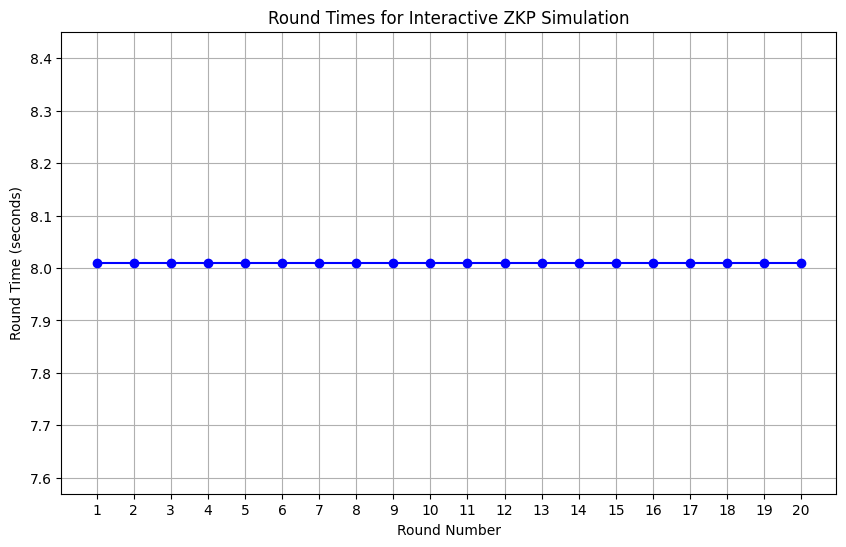

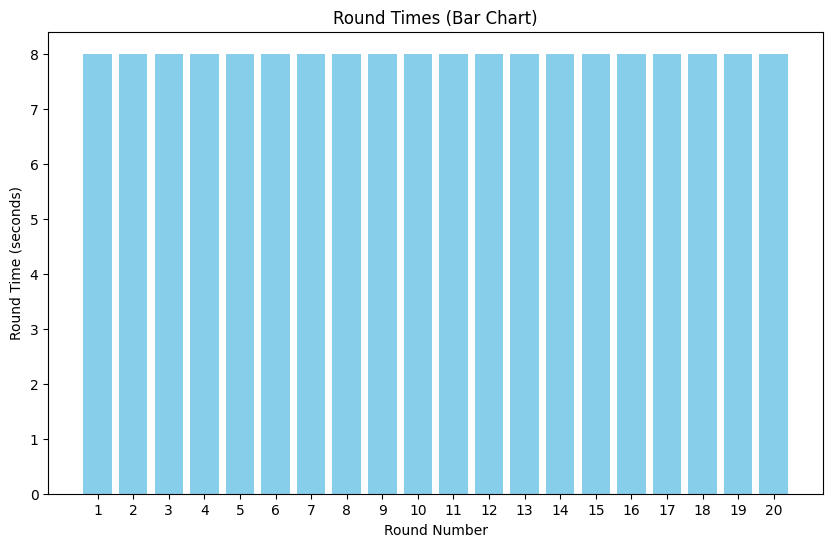

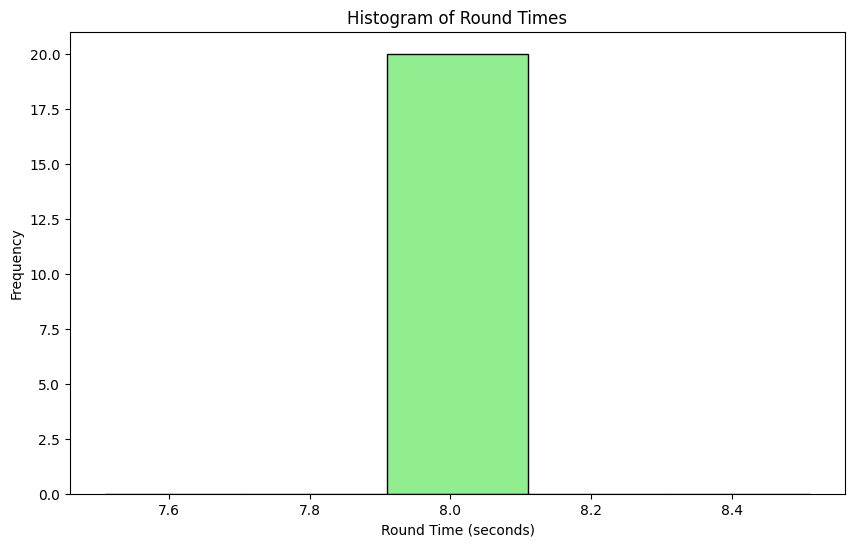

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import statistics

# ----- Sample Data from Simulation -----
# Using your provided sample output where each round took 8.01 seconds for 20 rounds.
round_times = [8.01] * 20

# ----- Compute Statistical Values -----
total_time = sum(round_times)
average_time = total_time / len(round_times)
median_time = statistics.median(round_times)
min_time = min(round_times)
max_time = max(round_times)
std_dev = statistics.stdev(round_times) if len(round_times) > 1 else 0

# ----- Print Summary Statistics -----
print("="*80)
print("Comparative Metrics for Interactive ZKP Simulation (Schnorr Protocol):")
print("="*80)
print(f"Number of Rounds         : {len(round_times)}")
print(f"Total Simulation Time    : {total_time:.2f} seconds")
print(f"Average Round Time       : {average_time:.2f} seconds")
print(f"Median Round Time        : {median_time:.2f} seconds")
print(f"Minimum Round Time       : {min_time:.2f} seconds")
print(f"Maximum Round Time       : {max_time:.2f} seconds")
print(f"Standard Deviation       : {std_dev:.2f} seconds")
print("="*80)

# ----- Prepare Data for Plotting -----
round_numbers = list(range(1, len(round_times) + 1))

# ----- Plot 1: Line Plot of Round Times -----
plt.figure(figsize=(10,6))
plt.plot(round_numbers, round_times, marker='o', linestyle='-', color='blue')
plt.title("Round Times for Interactive ZKP Simulation")
plt.xlabel("Round Number")
plt.ylabel("Round Time (seconds)")
plt.xticks(round_numbers)
plt.grid(True)
plt.show()

# ----- Plot 2: Bar Chart of Round Times -----
plt.figure(figsize=(10,6))
plt.bar(round_numbers, round_times, color='skyblue')
plt.title("Round Times (Bar Chart)")
plt.xlabel("Round Number")
plt.ylabel("Round Time (seconds)")
plt.xticks(round_numbers)
plt.show()

# ----- Plot 3: Histogram of Round Times -----
plt.figure(figsize=(10,6))
plt.hist(round_times, bins=5, color='lightgreen', edgecolor='black')
plt.title("Histogram of Round Times")
plt.xlabel("Round Time (seconds)")
plt.ylabel("Frequency")
plt.show()


In [ ]:
import asyncio, time, random, json, hashlib, statistics

# ------------------------------
# Shared Helper Functions
# ------------------------------

def current_time():
    return time.strftime('%H:%M:%S')

def hash_leaf(data: str) -> str:
    """Return the SHA256 hash of the given string data."""
    return hashlib.sha256(data.encode()).hexdigest()

def build_merkle_tree(leaves: list, delay: float = 0) -> list:
    """
    Build a Merkle tree from a list of leaves.
    Returns the tree as a list of levels (level 0: leaves).
    Optionally delays between levels to simulate processing time.
    """
    tree = [leaves]
    current_level = leaves.copy()
    while len(current_level) > 1:
        next_level = []
        if len(current_level) % 2 == 1:
            current_level.append(current_level[-1])
        for i in range(0, len(current_level), 2):
            combined = current_level[i] + current_level[i+1]
            next_level.append(hash_leaf(combined))
        tree.append(next_level)
        current_level = next_level
        if delay:
            time.sleep(delay)
    return tree

def get_merkle_root(tree: list) -> str:
    """Return the Merkle root (the sole hash in the final level)."""
    return tree[-1][0]

def get_merkle_proof(tree: list, index: int) -> list:
    """Return the Merkle proof (list of sibling hashes) for a leaf at the given index."""
    proof = []
    for level in tree[:-1]:
        sibling_index = index+1 if index % 2 == 0 else index-1
        proof.append(level[sibling_index])
        index //= 2
    return proof

def verify_merkle_proof(leaf: str, proof: list, root: str, index: int) -> bool:
    """Verify the Merkle proof for the given leaf and index."""
    current_hash = hash_leaf(leaf)
    for sibling_hash in proof:
        if index % 2 == 0:
            current_hash = hash_leaf(current_hash + sibling_hash)
        else:
            current_hash = hash_leaf(sibling_hash + current_hash)
        index //= 2
    return current_hash == root

# ------------------------------
# Setup for zk-STARK Simulation
# ------------------------------

# Define a simple polynomial: f(x) = 2x + 3
def f(x):
    return 2 * x + 3

domain = list(range(8))  # Domain: x=0,...,7
# Compute evaluations as strings
evaluations = [str(f(x)) for x in domain]
# Create leaves by hashing each evaluation
leaves = [hash_leaf(val) for val in evaluations]

# ------------------------------
# Verifier Server (zk-STARK Verifier)
# ------------------------------

async def stark_verifier(reader: asyncio.StreamReader, writer: asyncio.StreamWriter):
    peer = writer.get_extra_info('peername')
    print(f"[{current_time()}] [Verifier] Connection accepted from {peer}")

    # Read the incoming JSON message (ending with a newline)
    data = await reader.readline()
    if not data:
        writer.close()
        return
    try:
        message = json.loads(data.decode().strip())
    except Exception as e:
        print(f"[{current_time()}] [Verifier] Error decoding message: {e}")
        writer.close()
        return

    # Extract fields: merkle_root, index, evaluation, proof
    merkle_root = message.get("merkle_root")
    index = message.get("index")
    evaluation = message.get("evaluation")
    proof = message.get("proof")

    print(f"[{current_time()}] [Verifier] Received Merkle Root: {merkle_root}")
    print(f"[{current_time()}] [Verifier] Received evaluation for index {index}: {evaluation}")
    print(f"[{current_time()}] [Verifier] Received Merkle Proof: {proof}")
    await asyncio.sleep(2)  # simulate network delay

    # Verify the proof: The leaf is the hash of the evaluation string.
    leaf = evaluation  # In our simulation, we assume the leaf is computed as hash_leaf(evaluation)
    valid = verify_merkle_proof(leaf, proof, merkle_root, index)
    print(f"[{current_time()}] [Verifier] Verification {'Successful' if valid else 'Failed'}")
    await asyncio.sleep(2)

    # Send back the result as JSON (just a simple OK/FAIL message)
    response = {"result": "OK" if valid else "FAIL"}
    writer.write((json.dumps(response) + "\n").encode())
    await writer.drain()

    print(f"[{current_time()}] [Verifier] Closing connection.\n")
    writer.close()
    await writer.wait_closed()

# ------------------------------
# Prover Client (zk-STARK Prover)
# ------------------------------

async def stark_prover(round_num: int, delay_between_rounds: float = 1.0, network_delay: float = 2.0):
    round_start = time.time()

    # The prover builds the Merkle tree (simulate processing delay)
    print(f"[{current_time()}] [Prover] (Round {round_num}) Building Merkle tree for polynomial evaluations...")
    tree = build_merkle_tree(leaves, delay=network_delay/2)  # delay per level
    merkle_root = get_merkle_root(tree)
    await asyncio.sleep(network_delay)  # simulate delay after building tree

    # Choose an index for which to prove the evaluation.
    # For demonstration, we can choose a fixed index (say, index 3)
    index = 3
    evaluation = evaluations[index]
    proof = get_merkle_proof(tree, index)

    print(f"[{current_time()}] [Prover] (Round {round_num}) Prepared commitment (Merkle Root): {merkle_root}")
    print(f"[{current_time()}] [Prover] (Round {round_num}) Evaluation for index {index}: {evaluation}")
    print(f"[{current_time()}] [Prover] (Round {round_num}) Merkle Proof: {proof}")
    await asyncio.sleep(network_delay)

    # Prepare the message (as a JSON object)
    message = {
        "merkle_root": merkle_root,
        "index": index,
        "evaluation": evaluation,
        "proof": proof
    }

    # Connect to the verifier server and send the message.
    reader, writer = await asyncio.open_connection('127.0.0.1', 8889)
    print(f"[{current_time()}] [Prover] (Round {round_num}) Connected to verifier.")
    writer.write((json.dumps(message) + "\n").encode())
    await writer.drain()
    await asyncio.sleep(network_delay)

    # Read the verifier's response.
    data = await reader.readline()
    response = json.loads(data.decode().strip())
    result = response.get("result", "FAIL")
    print(f"[{current_time()}] [Prover] (Round {round_num}) Received verification result: {result}")

    writer.close()
    await writer.wait_closed()

    round_duration = time.time() - round_start
    print(f"[{current_time()}] [Prover] (Round {round_num}) Completed in {round_duration:.2f} seconds.\n")
    await asyncio.sleep(delay_between_rounds)
    return round_duration, result

# ------------------------------
# Main Routine: Run Multiple Rounds for zk-STARK Simulation
# ------------------------------

async def run_multiple_rounds_stark(num_rounds: int = 10):
    # Start the verifier server on localhost:8889
    server = await asyncio.start_server(stark_verifier, '127.0.0.1', 8889)
    addr = server.sockets[0].getsockname()
    print(f"[{current_time()}] [Main] zk-STARK Verifier Server started on {addr}\n")

    # Run the server forever (in a background task)
    server_task = asyncio.create_task(server.serve_forever())

    # Run multiple rounds of the prover simulation.
    round_times = []
    results = []
    for i in range(1, num_rounds + 1):
        print(f"================ Round {i} =================")
        r_time, result = await stark_prover(round_num=i, delay_between_rounds=1.0, network_delay=2.0)
        round_times.append(r_time)
        results.append(result)

    # Cancel the server once rounds are complete.
    server_task.cancel()
    try:
        await server_task
    except asyncio.CancelledError:
        print(f"[{current_time()}] [Main] Verifier Server task cancelled.")

    # Compute statistics.
    avg_time = sum(round_times) / len(round_times)
    median_time = statistics.median(round_times)
    min_time = min(round_times)
    max_time = max(round_times)
    std_dev = statistics.stdev(round_times) if len(round_times) > 1 else 0

    print("\n" + "="*80)
    print("Comparative Metrics for zk-STARK Simulation (Merkle Commitment):")
    print("="*80)
    print(f"Number of Rounds       : {num_rounds}")
    print(f"Total Simulation Time  : {sum(round_times):.2f} seconds")
    print(f"Average Round Time     : {avg_time:.2f} seconds")
    print(f"Median Round Time      : {median_time:.2f} seconds")
    print(f"Minimum Round Time     : {min_time:.2f} seconds")
    print(f"Maximum Round Time     : {max_time:.2f} seconds")
    print(f"Standard Deviation     : {std_dev:.2f} seconds")
    print(f"Verification Results   : {results}")
    print("="*80 + "\n")

    return round_times

# ------------------------------
# Run the zk-STARK Simulation
# ------------------------------

start_sim = time.time()
await run_multiple_rounds_stark(num_rounds=10)
end_sim = time.time()
print(f"Total simulation time: {end_sim - start_sim:.2f} seconds")


[14:18:34] [Main] zk-STARK Verifier Server started on ('127.0.0.1', 8889)

================ Round 1 =================
[14:18:34] [Prover] (Round 1) Building Merkle tree for polynomial evaluations...
[14:18:39] [Prover] (Round 1) Prepared commitment (Merkle Root): 5844ff97e71d9fee7249808e41e5a599f193447e4f9376178019303aded008e9
[14:18:39] [Prover] (Round 1) Evaluation for index 3: 9
[14:18:39] [Prover] (Round 1) Merkle Proof: ['7902699be42c8a8e46fbbb4501726517e86b22c56a189f7625a6da49081b2451', 'cbbdb532fd7ee84304eabcfb4fb249da232dfe896b993ece77d1b6d4a90ef3a3', '669fab9b8ca4e1c2d4abddd2382421c7a805ade9d5b10267509b6344f9d55034']
[14:18:41] [Verifier] Connection accepted from ('127.0.0.1', 51744)
[14:18:41] [Prover] (Round 1) Connected to verifier.
[14:18:41] [Verifier] Received Merkle Root: 5844ff97e71d9fee7249808e41e5a599f193447e4f9376178019303aded008e9
[14:18:41] [Verifier] Received evaluation for index 3: 9
[14:18:41] [Verifier] Received Merkle Proof: ['7902699be42c8a8e46fbbb4501726517